In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.drop("CustomerID",axis=1,inplace=True)

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.isnull().values.any()

False

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual_Income_(k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Spending_Score,200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


In [8]:
df.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [9]:
df_female=df[df["Genre"]=="Female"]

In [10]:
df_female.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
5,Female,22,17,76
6,Female,35,18,6


In [11]:
df_male=df[df['Genre']=='Male']

In [12]:
df_male.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
0,Male,19,15,39
1,Male,21,15,81
8,Male,64,19,3
10,Male,67,19,14
14,Male,37,20,13


In [13]:
df_female_new=df_female.drop('Genre',axis=1)
df_male_new=df_male.drop('Genre',axis=1)

In [14]:
df_female_new.head()

,Age,Annual_Income_(k$),Spending_Score
2,20,16,6
3,23,16,77
4,31,17,40
5,22,17,76
6,35,18,6


In [15]:
df_male_new.head()

,Age,Annual_Income_(k$),Spending_Score
0,19,15,39
1,21,15,81
8,64,19,3
10,67,19,14
14,37,20,13


In [16]:
from sklearn.cluster import KMeans

In [17]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
wcss=[]
for i in range(1,11):
    kmeans_model_female=KMeans(n_clusters=i,init='k-means++',random_state=42).fit(df_female_new)
    wcss.append(kmeans_model_female.inertia_)

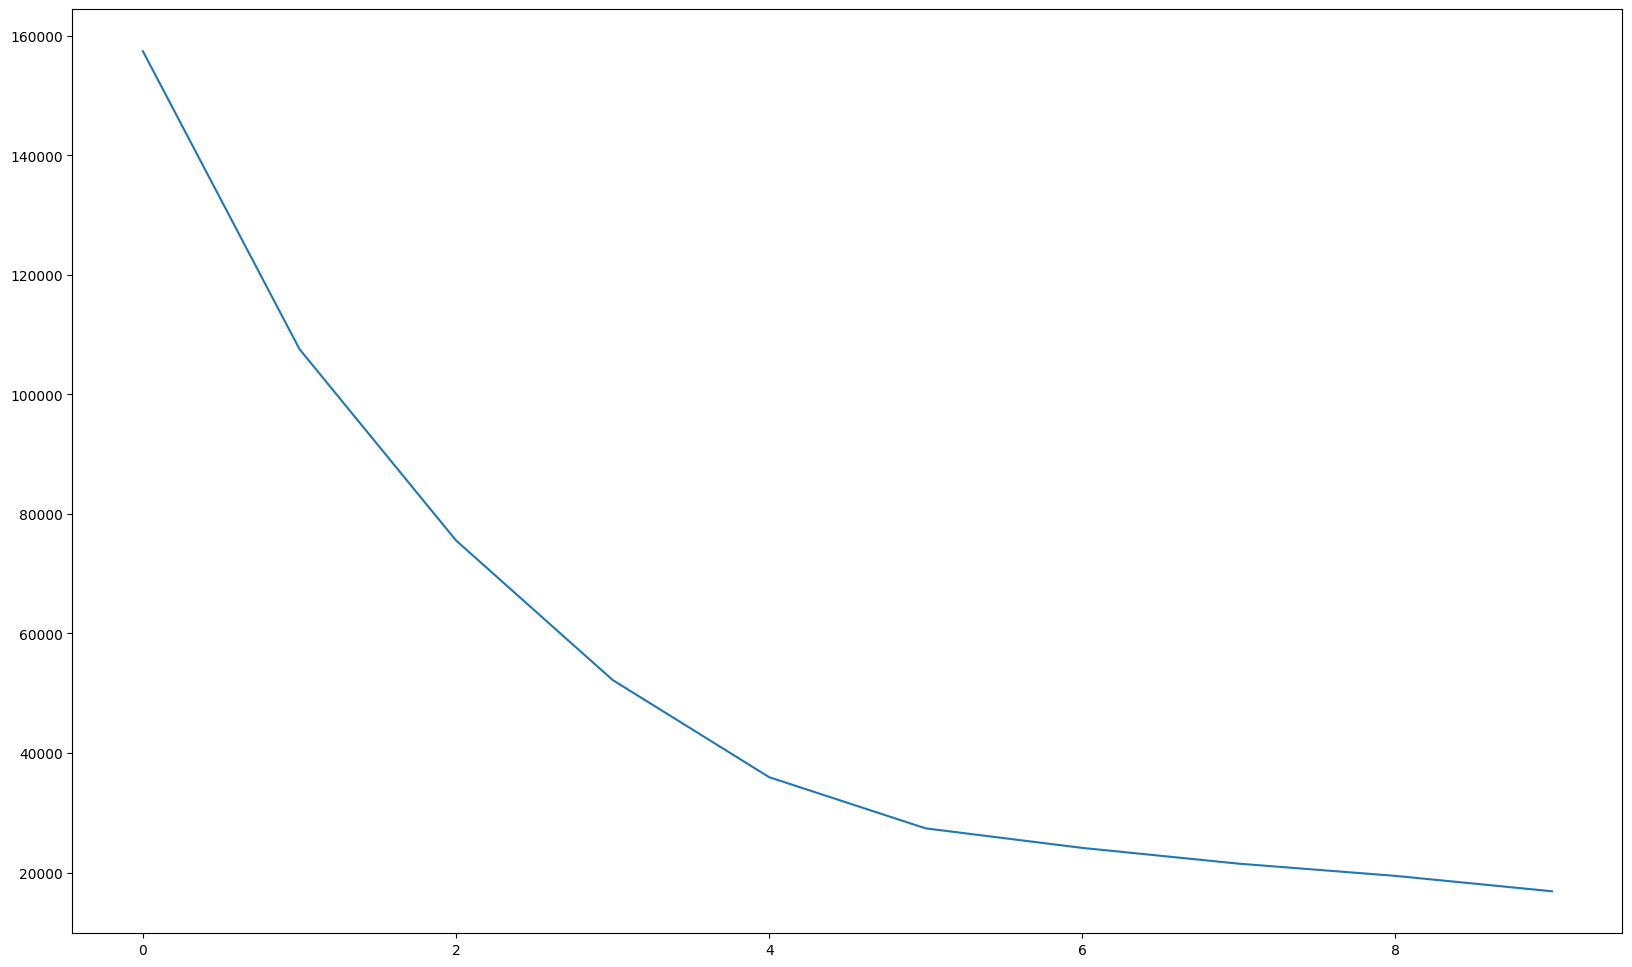

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,12))
plt.plot(wcss);

In [22]:
from mpl_toolkits.mplot3d import Axes3D

In [23]:
kmeans_model_f=KMeans(n_clusters=5,init='k-means++',random_state=42).fit(df_female_new)

In [24]:
clusters_f=kmeans_model_f.labels_
centers_f=kmeans_model_f.cluster_centers_

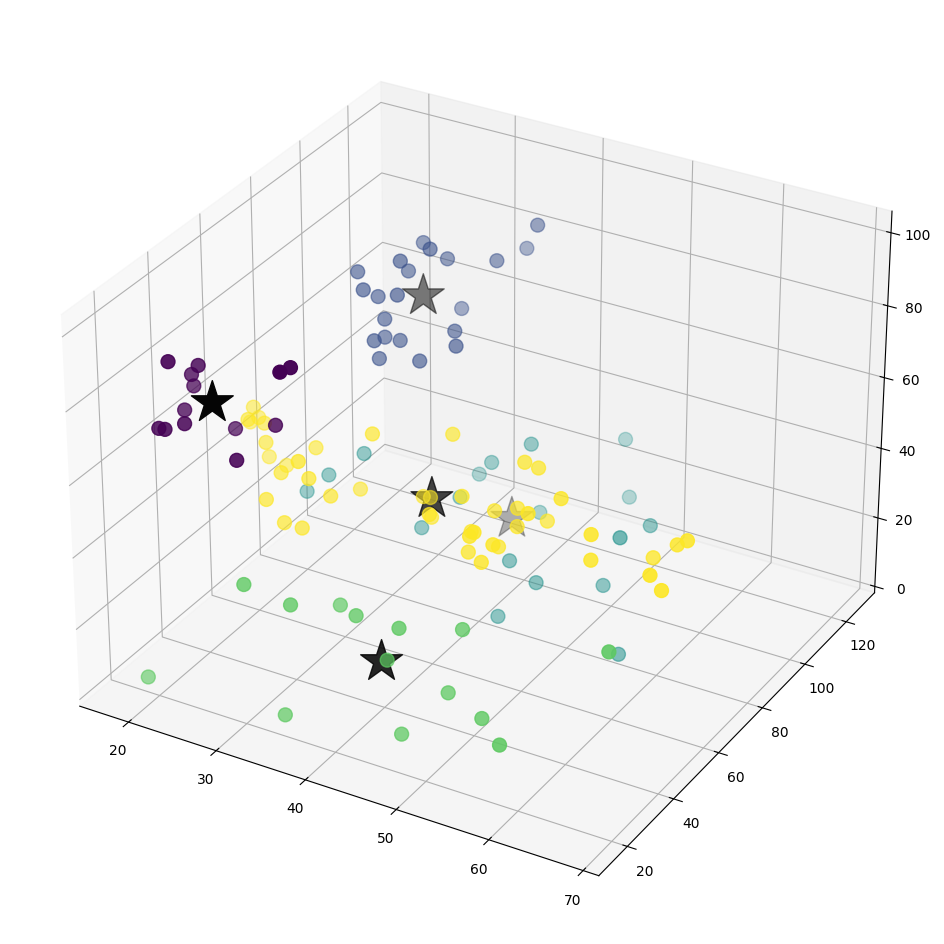

In [26]:
fig=plt.figure(figsize=(20,12))
ax=fig.add_subplot(projection='3d')
ax.scatter(df_female_new.iloc[:,0],df_female_new.iloc[:,1],df_female_new.iloc[:,2],c=clusters_f,s=100)
ax.scatter(centers_f[:,0],centers_f[:,1],centers_f[:,2],marker='*',c='#050505',s=1000);

In [27]:
from yellowbrick.cluster import KElbowVisualizer

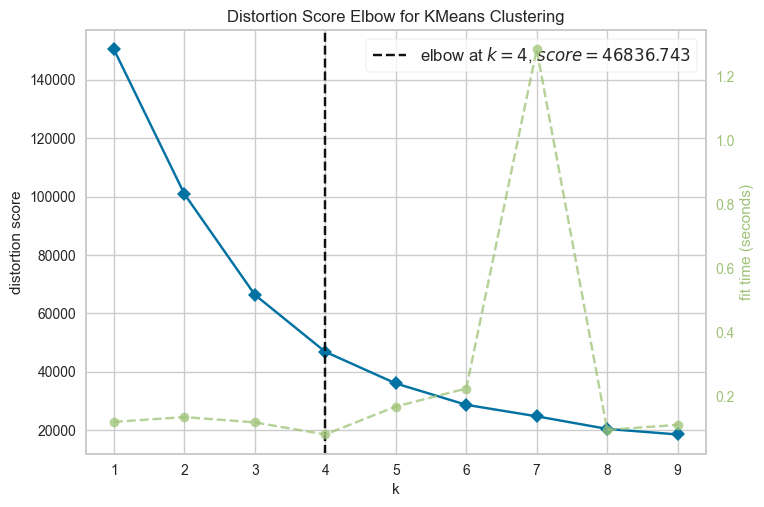

In [29]:
kmeans_model_male=KMeans()
visualizer=KElbowVisualizer(kmeans_model_male,k=(1,10))
visualizer.fit(df_male_new)
visualizer.poof();

In [30]:
kmeans_model_m=KMeans(n_clusters=4,init='k-means++',random_state=42).fit(df_male_new)

In [32]:
clusters_m=kmeans_model_m.labels_
centers_m=kmeans_model_m.cluster_centers_

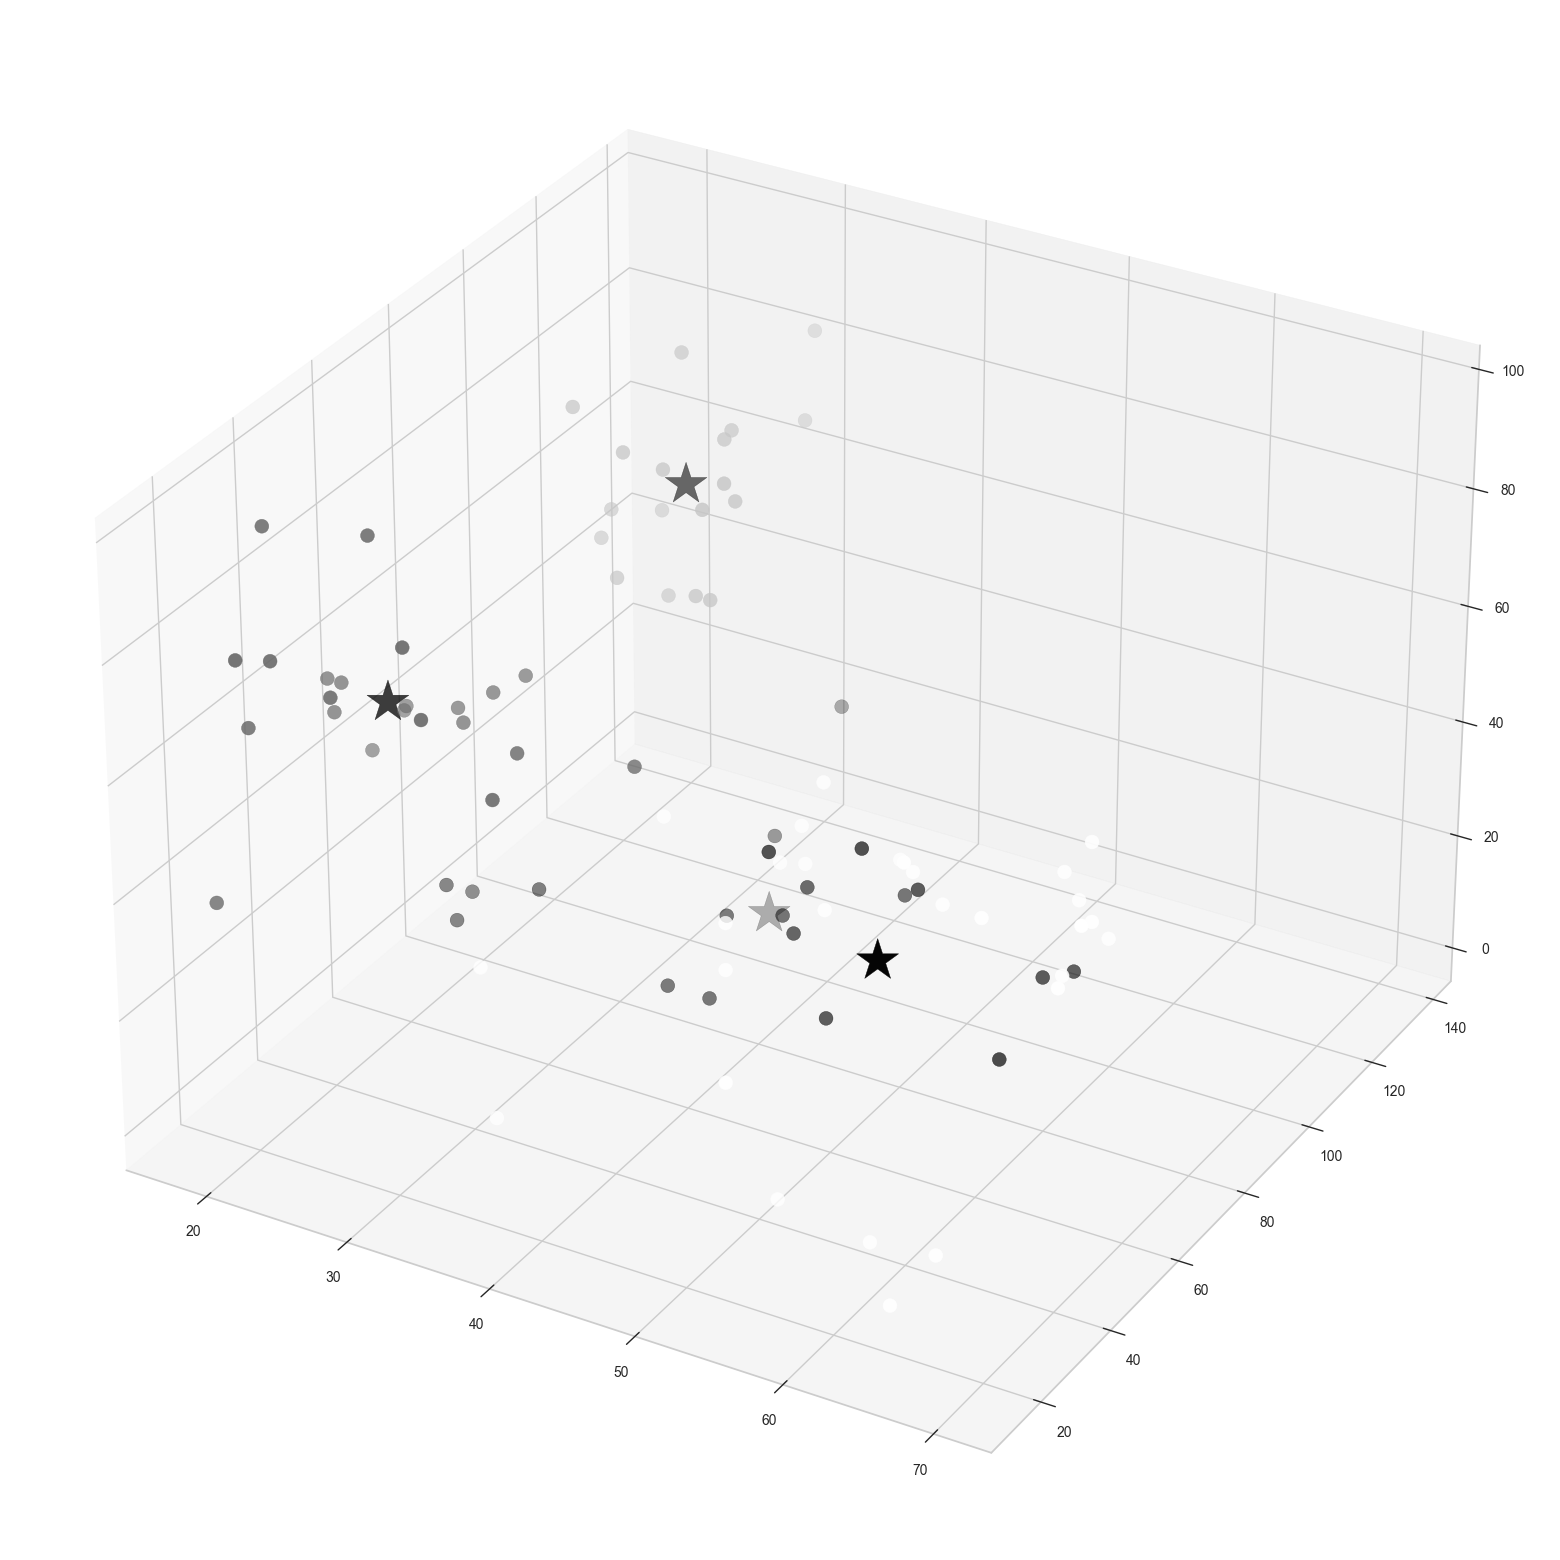

In [36]:
fig=plt.figure(figsize=(20,20))
ax=fig.add_subplot(projection='3d')
ax.scatter(df_male_new.iloc[:,0],df_male_new.iloc[:,1],df_male_new.iloc[:,2],c=clusters_m,s=100)
ax.scatter(centers_m[:,0],centers_m[:,1],centers_m[:,2],marker='*',c='#050505',s=1000);

In [70]:
from mpl_toolkits.mplot3d import Axes3D

In [71]:
kmeans_model=KMeans(n_clusters=5,init='k-means++',random_state=42).fit(df)

In [72]:
clusters=kmeans_model.labels_
centers=kmeans_model.cluster_centers_

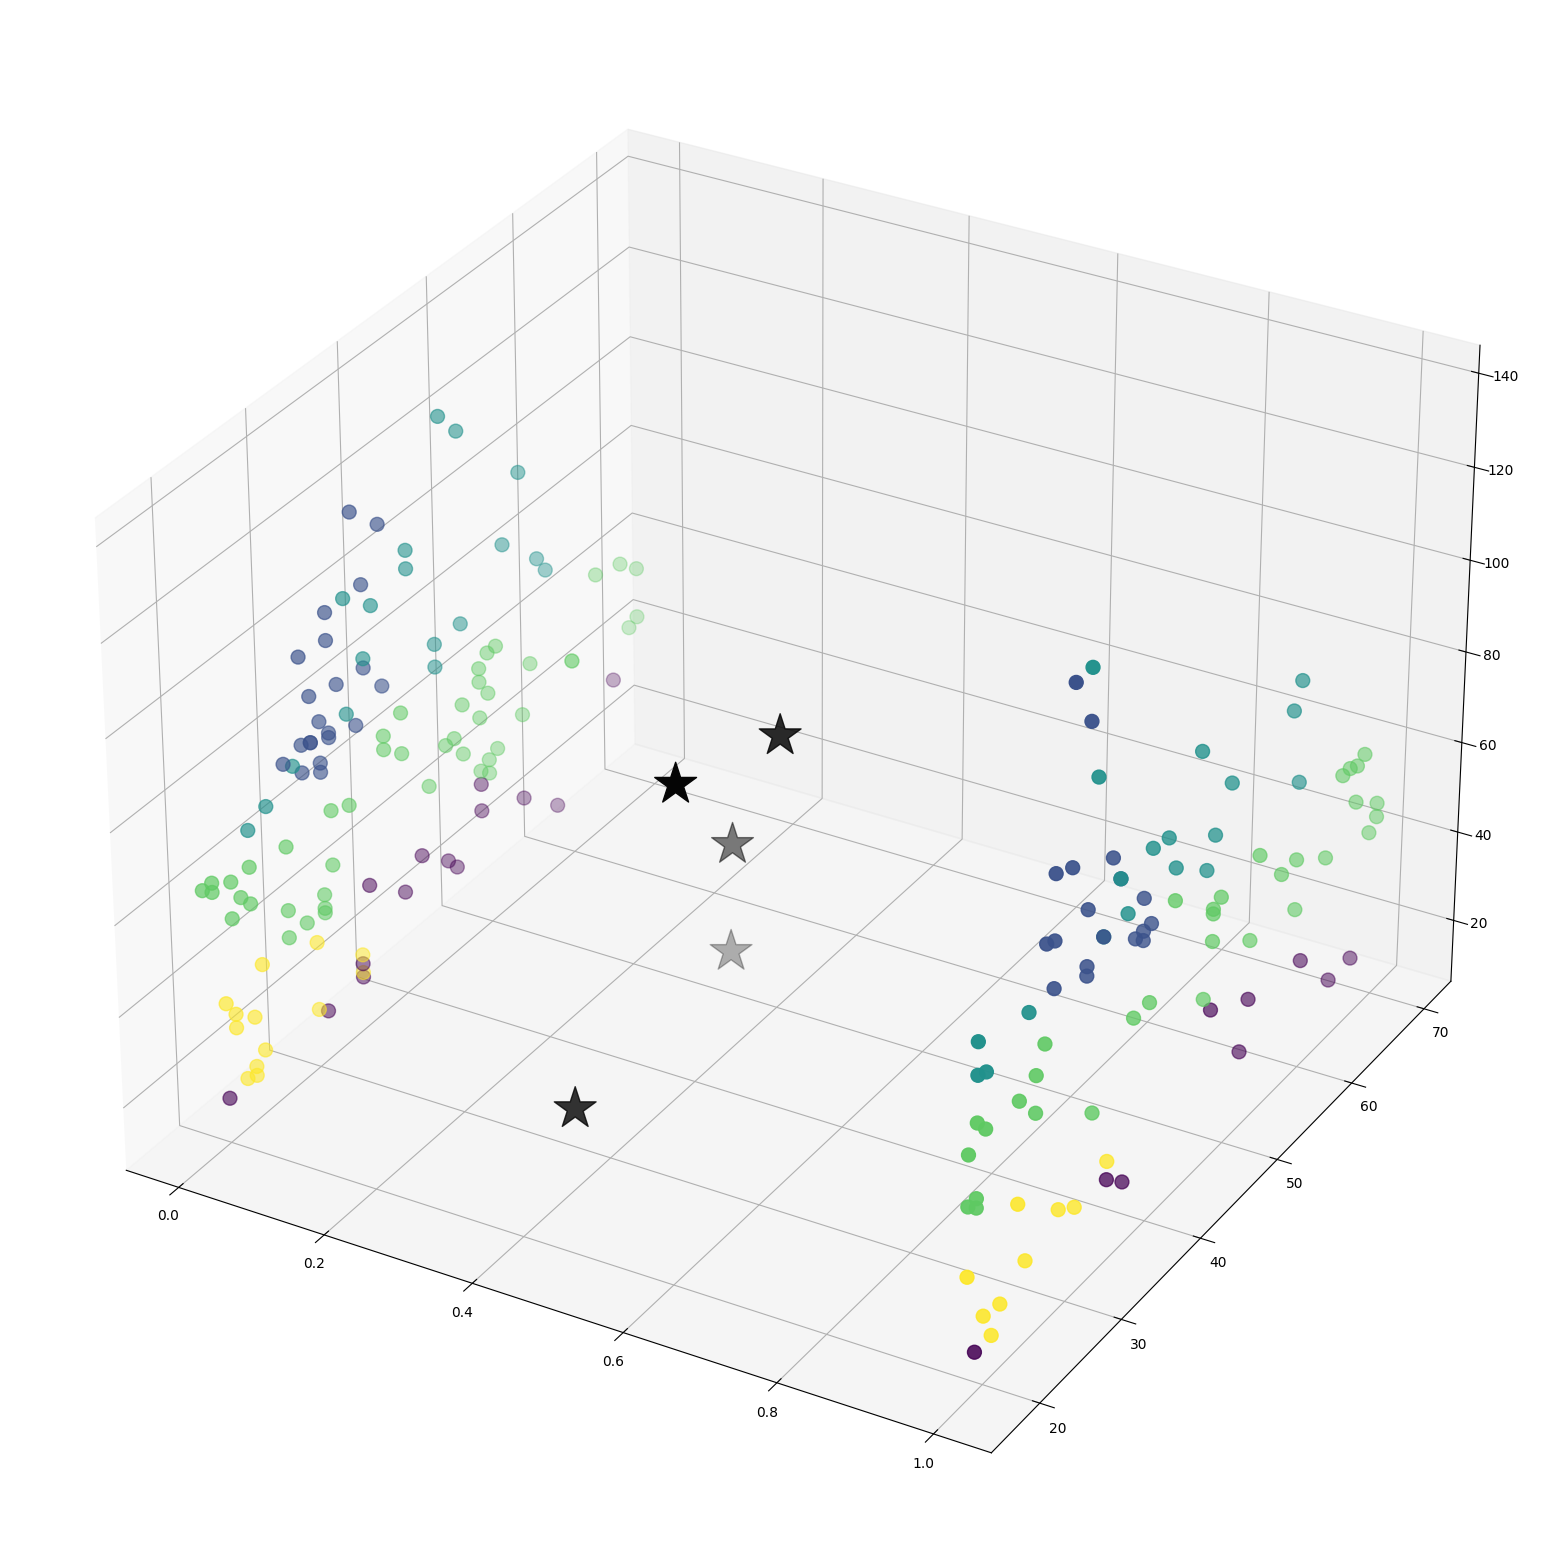

In [74]:
fig=plt.figure(figsize=(20,20))
ax=fig.add_subplot(projection='3d')
ax.scatter(df.iloc[:,0],df.iloc[:,1],df.iloc[:,2],c=clusters,s=100)
ax.scatter(centers[:,0],centers[:,1],centers[:,2],marker='*',c='#050505',s=1000);